In [3]:
!pip install MiniSom
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

%load_ext autoreload

  Stored in directory: C:\Users\ville\AppData\Local\pip\Cache\wheels\41\42\7d\dd12b479c5ea50cd572d91b8e935e4f11e1302acca329f84e0
Successfully built MiniSom


In [10]:
data = np.genfromtxt('neighborhood_features_unlabelled.csv', delimiter=',')
data


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training...
 [ 10000 / 10000 ] 100% - 1968.99 it/s - 0:00:00 left  - quantization error: 0.1190503901963501

...ready!


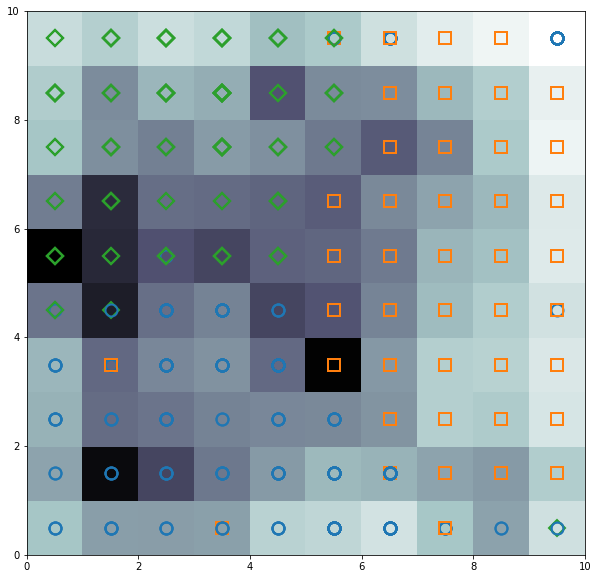

In [21]:
%autoreload 2
data = np.genfromtxt('neighborhood_features_unlabelled.csv', delimiter=',')
# data normalization

print(data)

# Initialization and training
som = MiniSom(10, 10, 661, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)

som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 10000, verbose=True)  # random training
print("\n...ready!")

plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

target = np.genfromtxt('city_names.csv', delimiter=',', dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'Berlin'] = 0
t[target == 'London'] = 1
t[target == 'Rome'] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 10, 0, 10])
# plt.savefig('resulting_images/som_iris.png')
plt.show()

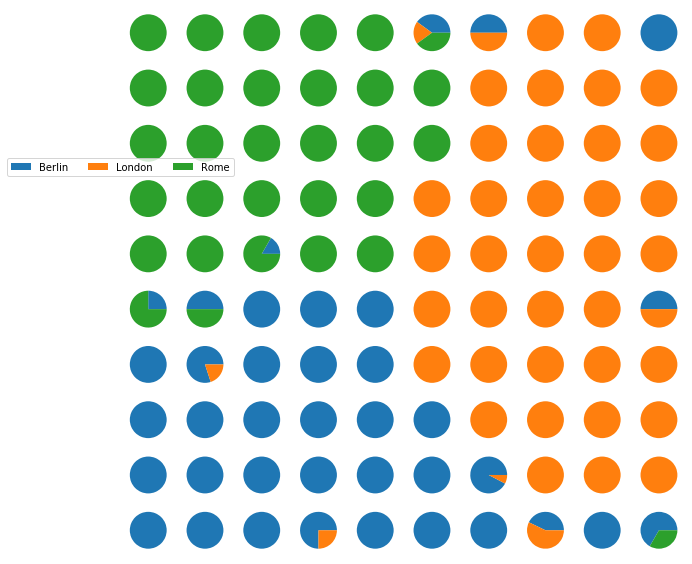

In [22]:
label = np.genfromtxt('city_names.csv', delimiter=',', dtype=str)
labels_map = som.labels_map(data, label)
label_names = np.unique(label)

plt.figure(figsize=(10, 10))
the_grid = GridSpec(10, 10)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[9-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()